# K-Means Clustering and Normalizing Data

In [49]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np




In [50]:
data = pd.read_csv("cluster_data_file.csv")
data

,X,Y
0,395.908476,1881.345540
1,526.572509,882.890512
2,697.924840,1027.401777
3,322.677442,470.364808
4,297.723100,530.346059
...,...,...
595,303.567863,525.876335
596,715.748040,1032.221677
597,611.760140,870.900420
598,419.822061,1861.508376


The dimension of the dataset: (600, 2)
Range of X: 185.6394128 > x > 750.2011858
Range of Y: 442.5713498 > y > 1904.38267


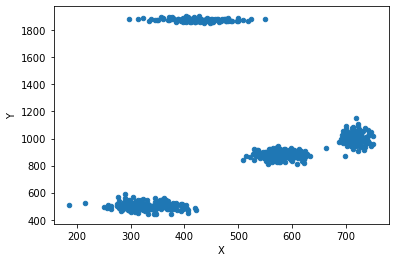

In [51]:
#1: dimension
print("The dimension of the dataset:", data.shape)

#2: ranges
min_max = data.agg(['min', 'max'])

x_min, x_max = min_max.loc['min']['X'], min_max.loc['max']['X']
y_min, y_max = min_max.loc['min']['Y'], min_max.loc['max']['Y']

print("Range of X:", x_min, "> x >", x_max)
print("Range of Y:", y_min, "> y >", y_max)


#3: scatterplot
data.plot(kind='scatter', x='X', y='Y')
plt.show()

   *Visually, there are 4 clusters*

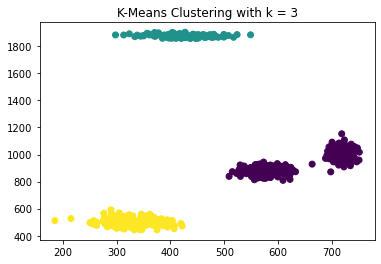

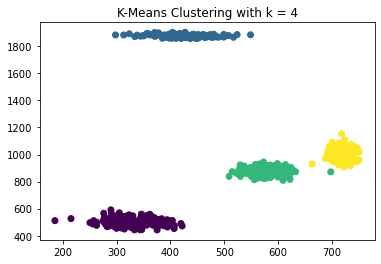

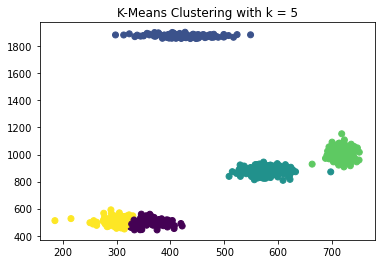

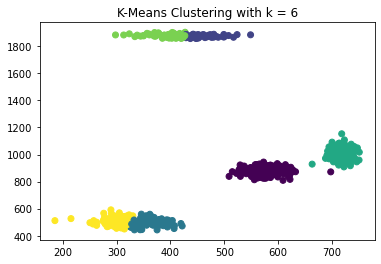

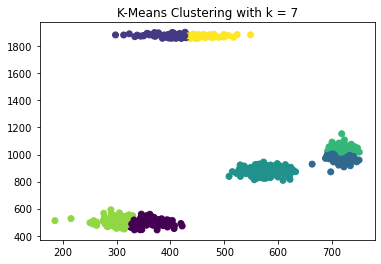

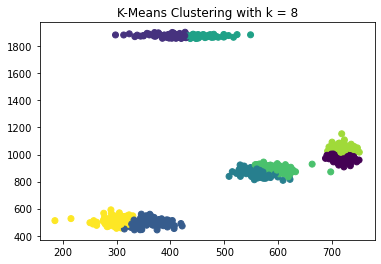

The best k according to silhouette score: 3


In [52]:
## Cluster!  use k-means with k = 3 through 8 clusters, and visualize this.
## Use the silhouette score to see which k is best.  is it the one you thought it was?
## The k-means sample code in the previous week will be quite helpful.


# Store the silhouette scores for each k value
sil_scores = []

# k= 3 to 8 loop
for k in range(3, 9):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    labels = kmeans.labels_
    sil_score = silhouette_score(data, labels)
    sil_scores.append(sil_score)
    
# Visualize the clusters
    plt.scatter(data['X'], data['Y'], c=labels)
    plt.title(f"K-Means Clustering with k = {k}")
    plt.show()

#picking best k
best_k = sil_scores.index(max(sil_scores)) + 3 # add 3 --> sil_scores starts at k=3 but index starts at 0 
print("The best k according to silhouette score:", best_k)
#I chose k=4 as a cluster but k=3 is the best model in clustering the data with a silhouette score of 0.84

5. Mathematically show which model is best.

*The highest silhouette score will be used to choose the best model, since a silhouette score ranges from -1 (wrong clustering) to 1 (correct clustering), a high score would indicate that each data point is assigned to its own cluster resulting in minimum mistakes for the point in being assigned to a wrong cluster. Based on the for loop below, which shows the calculated silhouette scores according to the different k values ranging from 3 to 8 clusters, the best model would be when using k=3 as it has the highest silhouette score (0.84). The high score shows that the sample points are well-assigned to their own cluster and most of the points are not assigned to other clusters by mistake; hence the k=3 model has the best clustering results.*

In [53]:
for k, score in zip(range(3, 9), sil_scores):
    print("k=", k, "silhouette score:", round((score),2))


k= 3 silhouette score: 0.84
k= 4 silhouette score: 0.81
k= 5 silhouette score: 0.69
k= 6 silhouette score: 0.59
k= 7 silhouette score: 0.52
k= 8 silhouette score: 0.42


## Part Two: more dimensions!

Load up "Cluster_data_2.csv", and describe the shape of the data.
Look at at least 5 different cluster models (different hyperparameters make for a different model).  Pick your best one, and illustrate it with a dendogram. 
Normalize the data, and then repeat your model selction process.  

In [54]:
cl2 = pd.read_csv("Cluster_data_2.csv")
cl2

,n,CLUSTER,X1,X2,X3,X4,X5
0,1,4,414.274551,183.313600,402.461117,204.629791,182.770666
1,2,4,408.858419,188.104810,400.947306,184.006465,179.488550
2,3,6,884.298532,245.378507,896.877530,204.847048,208.322498
3,4,7,923.101006,98.612232,945.305606,93.055072,114.891881
4,5,1,997.420209,342.480269,1012.344236,334.393390,304.547229
...,...,...,...,...,...,...,...
595,596,5,680.715257,343.055200,653.961304,314.721722,344.391418
596,597,4,398.711657,185.660565,409.699479,181.009432,189.558524
597,598,1,986.784046,342.386594,1006.397985,332.849938,332.499599
598,599,3,983.306702,364.043266,1015.481383,351.421193,328.464247


In [55]:
print("The dimension of the data is:", cl2.shape)

The dimension of the data is: (600, 7)


Number of clusters: 2, Silhouette score: 0.512551
Number of clusters: 3, Silhouette score: 0.437658
Number of clusters: 4, Silhouette score: 0.467056
Number of clusters: 5, Silhouette score: 0.468555
Number of clusters: 6, Silhouette score: 0.497697
Best KMeans model (number of clusters): 2, Best silhouette score:  0.512551


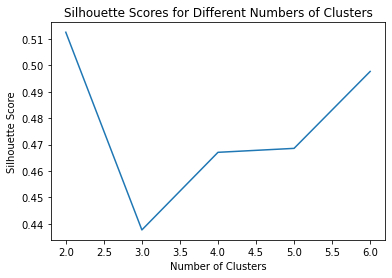

In [57]:
# Create empty lists to store the number of clusters and silhouette scores
n_clusters_list = []
silhouette_scores = []

# Try different number of clusters
for n_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(cl2) #fit the data
    score = silhouette_score(cl2, kmeans.labels_)
    n_clusters_list.append(n_clusters)
    silhouette_scores.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette score: {score:f}")
    

# Print the best number of clusters and corresponding silhouette score
best_idx = silhouette_scores.index(max(silhouette_scores))
print(f"Best KMeans model (number of clusters): {n_clusters_list[best_idx]}, Best silhouette score: {silhouette_scores[best_idx]: f}")


# Create the line chart
plt.plot(n_clusters_list, silhouette_scores)
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

The linechart shows that the number of clusters and the corresponding silhouette score, based on the small range of n_clusters provided which ranges from 2 to 6 (inclusive) shows the trend of silhouette scores as the number of clusters increases. This chart can hence be used to find the optimal number of clusters to use in the KMeans model. In this specific KMeans model, the most optimal number of clusters are 2 with a silhouette score of 0.51

Number of clusters: 2, Silhouette score:  0.435397
Number of clusters: 3, Silhouette score:  0.516494
Number of clusters: 4, Silhouette score:  0.521277
Number of clusters: 5, Silhouette score:  0.541684
Best KMeans model (number of clusters): 5 Silhouette score: 0.5416844958651652


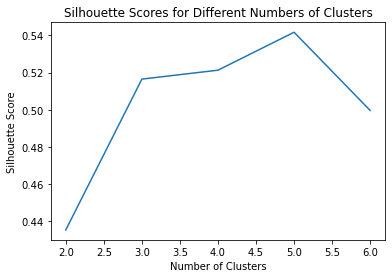

In [58]:
# Fit 5 different models with different numbers of clusters
models = [KMeans(n_clusters=i) for i in range(2, 7)]

# Normalize the data
scaler = StandardScaler()
cl2_normalized = scaler.fit_transform(cl2)

# Select the best model using the silhouette score
best_model = None
best_score = -1
n_clusters_list = []
silhouette_scores = []
for model in models:
    model.fit(cl2_normalized)
    if len(set(model.labels_)) > 1: # ensure there are at least 2 clusters
        score = silhouette_score(cl2_normalized, model.labels_)
        n_clusters = len(set(model.labels_))
        n_clusters_list.append(n_clusters)
        silhouette_scores.append(score)
        if score > best_score:
            best_model = model
            best_score = score
            print(f"Number of clusters: {n_clusters}, Silhouette score: {score: f}")

# Print the best model
print("Best KMeans model (number of clusters):", len(set(best_model.labels_)),"Silhouette score:", best_score)

# Create the line chart
plt.plot(n_clusters_list, silhouette_scores)
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


Explain how you chose your best model, including whether cleaning the data helped or not.

The best model was chosen based on the silhouette score, which measures the similarity of data points within a cluster compared to other clusters. The higher the silhouette score, the better the model is. To choose the best model, I fit 5 different KMeans models with different numbers of clusters ranging from 2 to 6 (inclusive), and calculated the silhouette score for each model. 

Before normalizing the data (which ensures that all of the features have a similiar scale - hence improving the performance of the model), the best number of clusers was 2 with a score of 0.51. However, after normalizing the cl2 data, the best model had a silhouete score of 0.54 (number of clusters: 5) which was higher than the original model.

For this particular data, cleaning the data did not have a significant impact on the results because the data did not have any missing values or outliers that would have affected the clustering results. However, normalizing the data (that is transforming it so that it has a mean=0 and a standard deviation=1), made the data comparable andensured that all the 5 features (X1 to X5) have the same scale.